# Phase 3: Asking meaningful questions that need to be answered

Cài đặt thêm thư viện ipynb để có thể import các variable từ các file notebook khác

In [3]:
! pip install ipynb

In [4]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')
sys.path.insert(0, '../phase_2_data_exploration')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%store -r df_titles
%store -r df_credits

df_titles = df_titles
df_credits = df_credits

In [7]:
df_titles.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy
1,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action
2,tm82253,The Best Years of Our Lives,MOVIE,1946,NONE,171,"romance, war, drama",US,0.0,tt0036868,8.1,63026.0,8.435,7.8,US,romance
3,tm83884,His Girl Friday,MOVIE,1940,NONE,92,"comedy, drama, romance",US,0.0,tt0032599,7.8,57835.0,11.270,7.4,US,comedy
4,tm56584,In a Lonely Place,MOVIE,1950,NONE,94,"thriller, drama, romance",US,0.0,tt0042593,7.9,30924.0,8.273,7.6,US,thriller


In [8]:
df_credits.head()

,id,name,character,role
0,ts20945,Joe Besser,Joe,ACTOR
1,ts20945,Moe Howard,Moe,ACTOR
2,ts20945,Larry Fine,Larry,ACTOR
3,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,Marion Mack,Annabelle Lee,ACTOR


In [9]:
df_data = df_titles.merge(df_credits, on='id', how='inner')
df_data.head()

,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,main_production_countries,main_genre,name,character,role
0,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,1934,TV-PG,19,"comedy, family, animation, action, fantasy, ho...",US,26.0,tt0850645,8.6,1092.0,15.424,7.6,US,comedy,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,1926,NONE,78,"action, drama, war, western, comedy, european",US,0.0,tt0017925,8.2,89766.0,8.647,8.0,US,action,Marion Mack,Annabelle Lee,ACTOR


### Q. Actors & Directors

In [114]:
role_data = df_data[df_data['release_year'] >= 2012].loc[:, ['id', 'title', 'imdb_score','tmdb_popularity', 'name', 'role']].drop_duplicates().dropna().reset_index(drop=True)
role_data.head(10)

,id,title,imdb_score,tmdb_popularity,name,role
0,ts27630,Line of Duty,8.7,52.202,Martin Compston,ACTOR
1,ts27630,Line of Duty,8.7,52.202,Vicky McClure,ACTOR
2,ts27630,Line of Duty,8.7,52.202,Adrian Dunbar,ACTOR
3,ts27630,Line of Duty,8.7,52.202,Gregory Piper,ACTOR
4,ts27630,Line of Duty,8.7,52.202,Nigel Boyle,ACTOR
5,ts27630,Line of Duty,8.7,52.202,Kelly Macdonald,ACTOR
6,ts27630,Line of Duty,8.7,52.202,Owen Teale,ACTOR
7,tm61801,Zero Dark Thirty,7.4,17.200,Jessica Chastain,ACTOR
8,tm61801,Zero Dark Thirty,7.4,17.200,Jason Clarke,ACTOR
9,tm61801,Zero Dark Thirty,7.4,17.200,Kyle Chandler,ACTOR


In [115]:
actor_data = role_data[role_data['role']=='ACTOR']
director_data = role_data[role_data['role']=='DIRECTOR']

In [121]:
actor_data_table = pd.pivot_table(actor_data, values='imdb_score', index='name', aggfunc={'name': len, 'imdb_score': np.mean})
actor_data_table = actor_data_table.rename(columns={'name': 'occurences'})
top10_actor = actor_data_table.sort_values(by='occurences', ascending=False).head(10)
top10_actor

,imdb_score,occurences
name,,
Nassar,6.081081,37
Fred Tatasciore,6.447222,36
Takahiro Sakurai,6.985294,34
Vennela Kishore,6.276471,34
Prakash Raj,6.654545,33
Jayaprakash,6.158621,29
Yuki Kaji,7.057143,28
Murali Sharma,6.177778,27
Grey DeLisle,6.233333,27


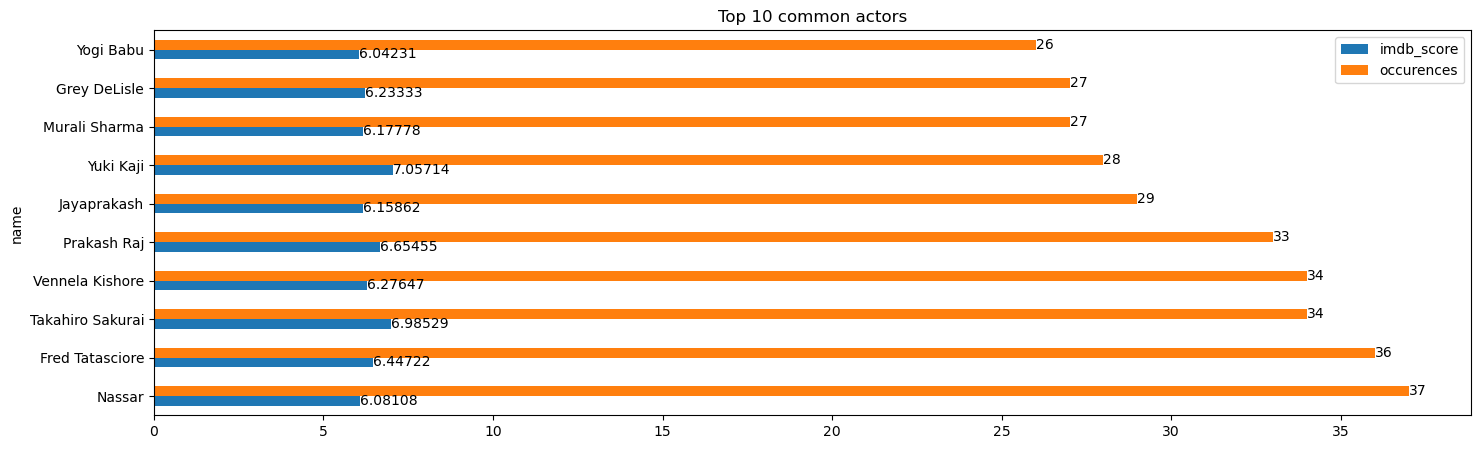

In [122]:
ax = top10_actor.plot.barh(figsize=(17, 5), title='Top 10 common actors')

ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

In [15]:
director_data_table = pd.pivot_table(director_data, values='imdb_score', index='name', aggfunc={'name': len, 'imdb_score': np.mean})
director_data_table = director_data_table.rename(columns={'name': 'occurences'})
top10_director = director_data_table.sort_values(by='occurences', ascending=False).head(10)
top10_director

,imdb_score,occurences
name,,
Jay Chapman,6.559524,42
Ryan Polito,6.412500,24
Jay Karas,6.691304,23
Raúl Campos,6.090000,20
Jan Suter,6.057895,19
Brian Volk-Weiss,6.670588,17
Marcus Raboy,6.758824,17
Cathy Garcia-Molina,7.060000,10
Troy Miller,6.140000,10


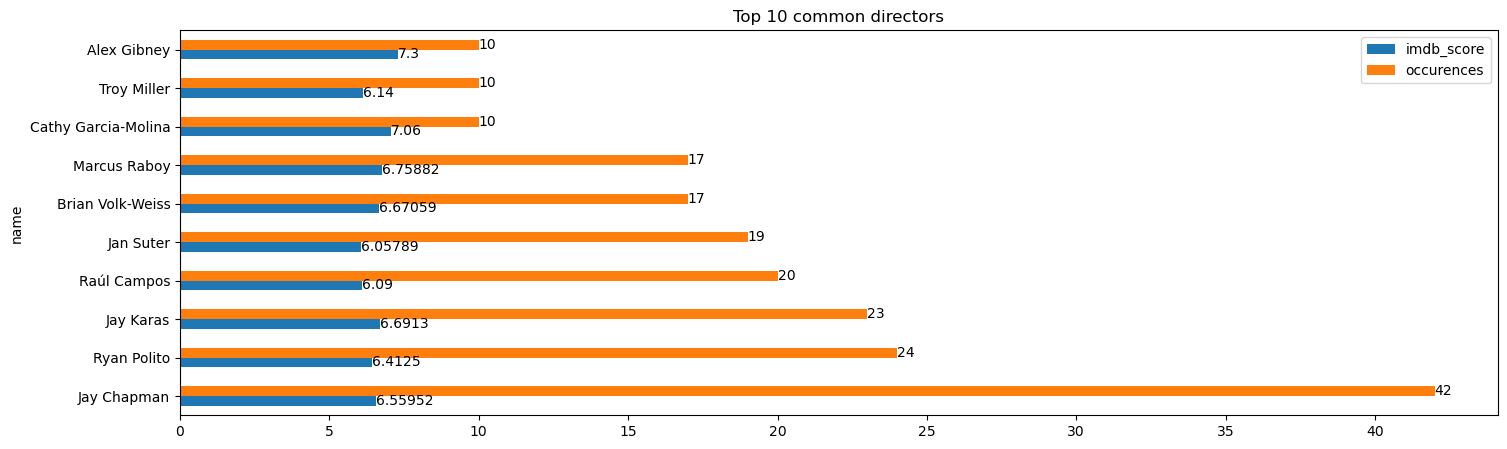

In [16]:
ax = top10_director.plot.barh(figsize=(17, 5), title='Top 10 common directors')

ax.bar_label(ax.containers[0], fontsize=10);
ax.bar_label(ax.containers[1], fontsize=10);

### Q. Movie&Show release & popularity distribution in 21st century

In [ ]:
last10y_release = df_data[df_data['release_year'] >= 2000].loc[:, ['release_year', 'id', 'type']].drop_duplicates().dropna().reset_index(drop=True)
last10y_release_table = pd.pivot_table(last10y_release, values='id', index='release_year', columns='type', aggfunc=len)

last10y_release_table

type,MOVIE,SHOW
release_year,,
2000,106,21
2001,124,25
2002,139,28
2003,134,31
2004,168,29
2005,168,33
2006,170,32
2007,208,36
2008,230,50


<AxesSubplot:xlabel='release_year'>

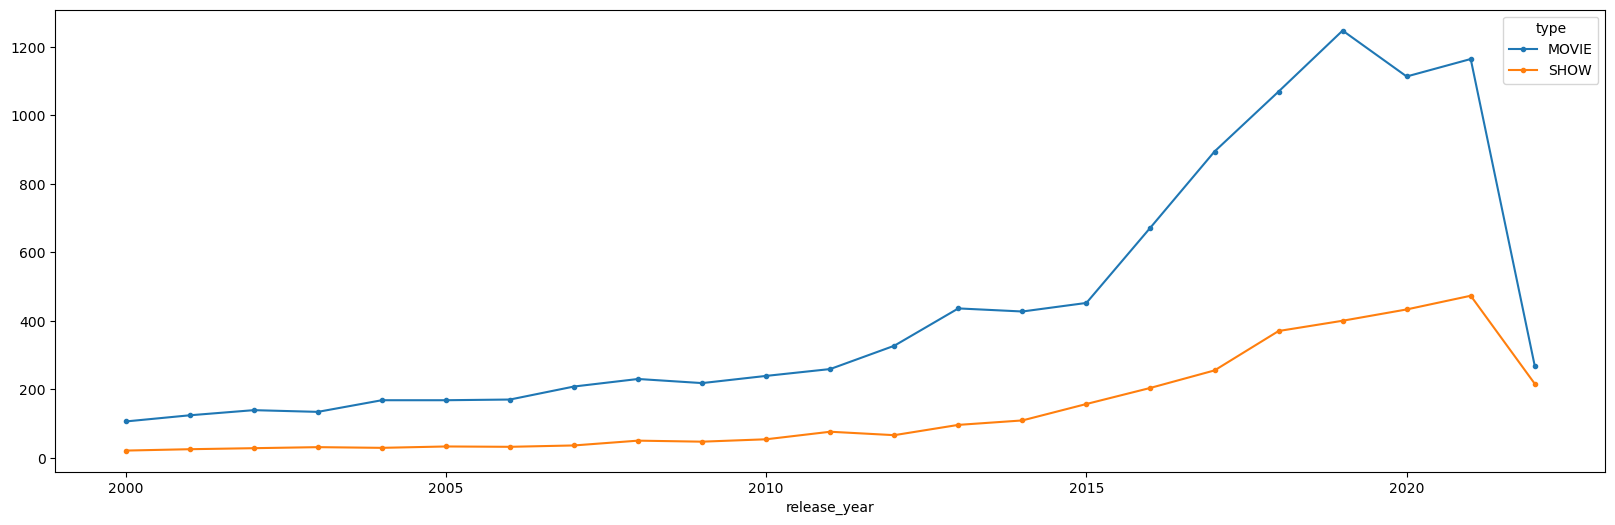

In [ ]:
last10y_release_table.plot(figsize=(20, 6), marker='.')

In [ ]:
last10y_popularity = df_data[df_data['release_year'] >= 2000].loc[:, ['release_year', 'type', 'tmdb_popularity']].drop_duplicates().dropna().reset_index(drop=True)
last10y_popularity_table = pd.pivot_table(last10y_popularity, values='tmdb_popularity', index='release_year', columns='type', aggfunc=np.mean)
last10y_popularity_table

type,MOVIE,SHOW
release_year,,
2000,10.297845,28.367522
2001,14.494070,22.196731
2002,12.539674,22.315467
2003,13.220405,26.645941
2004,13.320056,28.628167
2005,12.838904,60.500953
2006,11.149278,24.535000
2007,12.712059,24.991394
2008,12.062083,33.015396


<AxesSubplot:xlabel='release_year'>

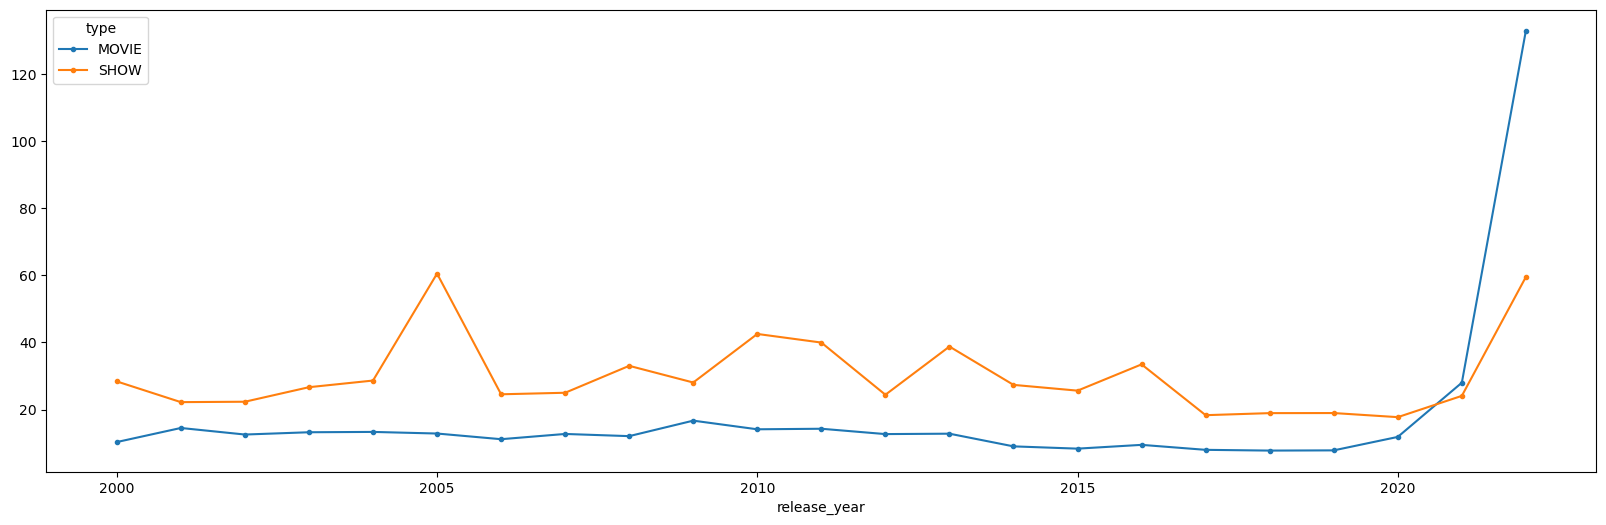

In [ ]:
last10y_popularity_table.plot(figsize=(20,6), marker='.')

### 1. IMDB votes và TMDB popularity lần lượt là số lượng phiếu bầu nhận được trên nền tảng IMDB và độ phổ biến trên nền tảng TMDB (được tính bởi số lượng votes, số lượng view, ...). Hai giá trị này có thể phần nào giúp ta nhận biết được mức độ nổi tiếng của 1 bộ phim/show truyền hình. Vậy trong các bộ phim được ra mắt khoảng 10 năm trở lại đây, đâu là top 10 bộ phim/show truyền hình nổi tiếng nhất, đánh giá dựa theo 2 tiêu chí được nêu?

Đầu tiên, ta cần lấy ra thông tin các bộ phim và show truyền hình được ra mắt từ năm 2012 tới nay

In [17]:
movie_show_popularity = df_data[df_data['release_year'] >= 2012].loc[:, ['id', 'title', 'type', 'release_year', 'imdb_votes', 'tmdb_popularity']].drop_duplicates().dropna().reset_index(drop=True)
movie_show_popularity.head()

,id,title,type,release_year,imdb_votes,tmdb_popularity
0,ts27630,Line of Duty,SHOW,2012,55784.0,52.202
1,tm61801,Zero Dark Thirty,MOVIE,2012,291985.0,17.200
2,tm61801,Zero Dark Thirty,MOVIE,2012,296416.0,24.241
3,tm72846,Skyfall,MOVIE,2012,684779.0,62.264
4,tm69294,Prometheus,MOVIE,2012,598691.0,86.605


Như ta thấy, phim Zero Dark Thirty có 2 dòng khác nhau trong bảng dữ liệu trên. Nguyên nhân là vì bộ dữ liệu được gộp lại từ các dữ liệu thu thập từ nhiều nguồn phát sóng phim khác nhau có thể dẫn đến thông tin của phim khác nhau. 

Điều này xảy ra trên 1 số lượng phim/ show nhất định

In [18]:
movie_show_popularity['id'].duplicated().sum()

70

Tuy nhiên ta sẽ không lọc các dòng trùng nhau, mà sẽ lấy trung bình cho các phim/show gặp hiện tượng trên.

Tiếp theo, ta tách tập dữ liệu thành 2 phần, phim và show truyền hình

In [19]:
movie_popularity = movie_show_popularity[movie_show_popularity['type']=='MOVIE']
show_popularity = movie_show_popularity[movie_show_popularity['type']=='SHOW']

Ta sẽ tiến hành tính điểm popularity của từng phim/show theo công thức Số lượng phiếu bầu IMDB + Độ nổi tiếng trên TMDB.

Sau đó ta scale tất cả điểm số tính được về khoảng 1-100 dựa trên tập dữ liệu. Ý nghĩa của việc scale đơn giản là để điểm số được đưa về thang điểm 100 thay vì để nguyên giá trị gốc (vì giá trị gốc có thể lên tới hàng triệu).

Hàm được khởi tạo dưới đây được dùng để làm điều này

In [20]:
def MinMaxScaler1_100(s):
    return (99*(s - s.min()))/(s.max()-s.min()) + 1

Điểm popularity =  MinMaxScaler1_100(Số lượng phiếu bầu IMDB + Độ nổi tiếng trên TMDB)

In [232]:
movie_popularity['popularity'] = MinMaxScaler1_100(movie_popularity['imdb_votes'] + movie_popularity['tmdb_popularity'])
show_popularity['popularity'] = MinMaxScaler1_100(show_popularity['imdb_votes'] + show_popularity['tmdb_popularity'])

/tmp/ipykernel_8245/977147094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_popularity['popularity'] = MinMaxScaler1_100(movie_popularity['imdb_votes'] + movie_popularity['tmdb_popularity'])
/tmp/ipykernel_8245/977147094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  show_popularity['popularity'] = MinMaxScaler1_100(show_popularity['imdb_votes'] + show_popularity['tmdb_popularity'])


Như đã nêu ở trên, có 1 số lượng phim nhất định có nhiều hơn 1 dòng dữ liệu khác nhau. Vì thế ta sẽ tính trung bình số điểm của các phim đó

In [22]:
movie_popularity_table = pd.pivot_table(movie_popularity, values='popularity', index='title', aggfunc=np.mean)
top10_movie_popularity = movie_popularity_table.nlargest(n=10, columns='popularity')
top10_movie_popularity

,popularity
title,
The Dark Knight Rises,100.000000
Django Unchained,88.349805
Joker,71.590591
The Hobbit: An Unexpected Journey,48.672156
The Imitation Game,45.857183
Man of Steel,45.706832
Skyfall,41.618640
12 Years a Slave,41.264562
Batman v Superman: Dawn of Justice,41.181515


Bảng trên hiển thị 10 bộ phim có điểm popularity (đã được scaled) cao nhất. Biểu độ cột dưới đây sẽ minh hoạ rõ hơn về kết quả thu được.

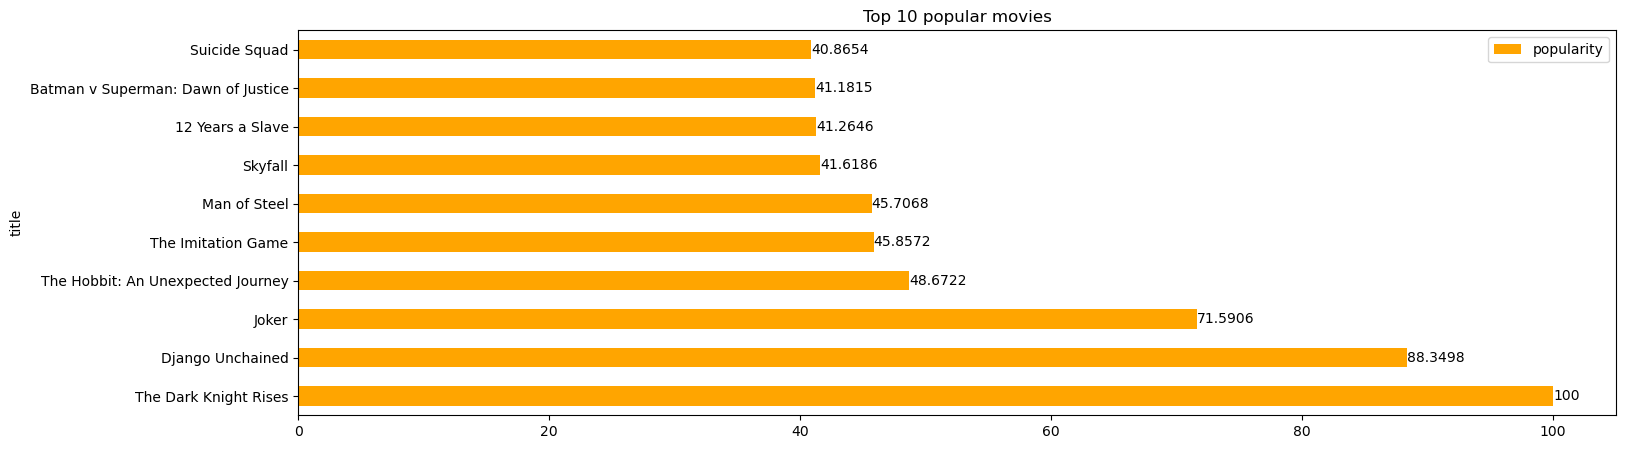

In [23]:
ax = top10_movie_popularity.plot.barh(figsize=(17, 5), color='orange', title='Top 10 popular movies')

ax.bar_label(ax.containers[0], fontsize=10);

Tương tự với phim, show truyền hình cũng sẽ có 1 số lượng show nhất định có nhiều hơn 1 dòng dữ liệu khác nhau. Ta cũng sẽ tính trung bình cho chúng.

In [24]:
show_popularity_table = pd.pivot_table(show_popularity, values='popularity', index='title', aggfunc=np.mean)
top10_show_popularity = show_popularity_table.nlargest(n=10, columns='popularity')
top10_show_popularity

,popularity
title,
Stranger Things,100.000000
Chernobyl,63.275782
True Detective,50.037251
Peaky Blinders,47.006012
Vikings,46.649429
House of Cards,45.658033
Westworld,43.612016
Rick and Morty,43.549804
The Witcher,43.380607


Bảng trên hiển thị 10 show có điểm popularity (đã được scaled) cao nhất. Biểu độ cột dưới đây sẽ minh hoạ rõ hơn về kết quả thu được.

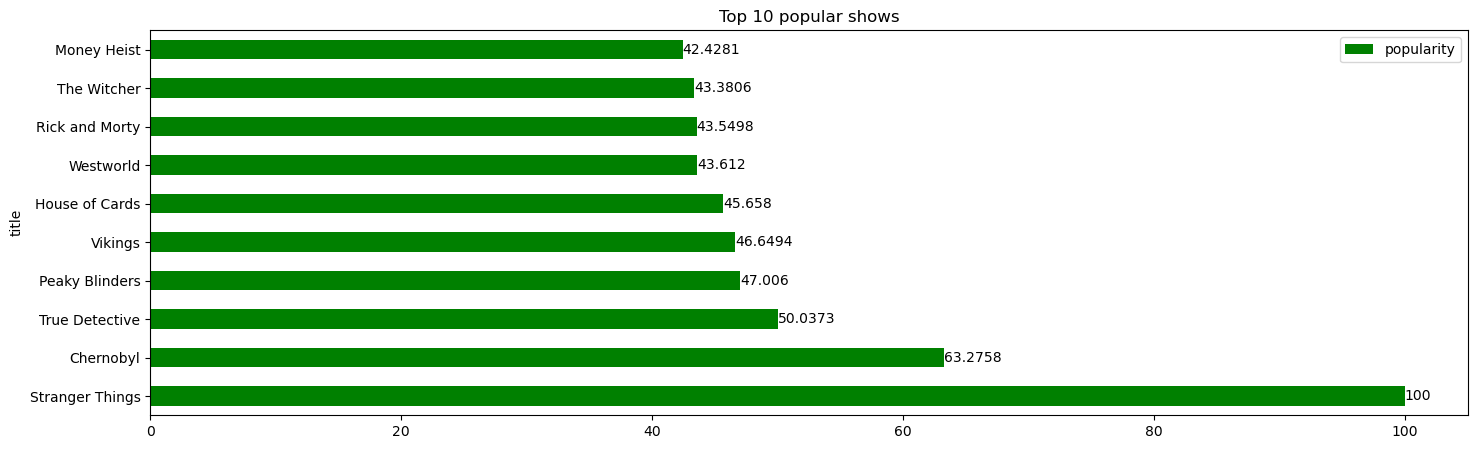

In [25]:
ax = top10_show_popularity.plot.barh(figsize=(17, 5), color='green', title='Top 10 popular shows')

ax.bar_label(ax.containers[0], fontsize=10);

Kết quả cho ta thấy top 10 phim và top 10 show nổi tiếng nhất được ra mắt trong 10 năm trở lại đây. Kết quả thu được cho thấy độ phổ biến của các bộ phim/show (với số lượng phiều bầu, số lượt xem,... vượt trội), có giá trị tham khảo đối với mục đích đề cử và đánh giá xa hơn.

### 2. IMDB score và TMDB score lần lượt là điểm số đánh giá trung bình của phim/show trên 2 nền tảng. Các điểm số này có thể đánh giá được chất lượng của phim/show và độ yêu thích của khán giả đối với phim/show đó. Vậy trong các bộ phim được ra mắt khoảng 10 năm trở lại đây, đâu là top 10 bộ phim/show truyền hình có điểm đánh giá cao nhất, dựa theo 2 tiêu chí đánh giá được nêu?

Đầu tiên, ta cần lấy ra thông tin các bộ phim và show truyền hình được ra mắt từ năm 2012 tới nay

In [26]:
movie_show_score = df_data[df_data['release_year'] >= 2012].loc[:, ['id', 'title', 'type', 'release_year', 'imdb_score', 'tmdb_score']].drop_duplicates().dropna().reset_index(drop=True)
movie_show_score.head()

,id,title,type,release_year,imdb_score,tmdb_score
0,ts27630,Line of Duty,SHOW,2012,8.7,8.2
1,tm61801,Zero Dark Thirty,MOVIE,2012,7.4,7.0
2,tm72846,Skyfall,MOVIE,2012,7.8,7.2
3,tm69294,Prometheus,MOVIE,2012,7.0,6.5
4,tm53381,Jack Reacher,MOVIE,2012,7.0,6.6


Tính điểm đánh giá trung bình của phim/show = (điểm IMDB + điểm TMDB)/2

In [27]:
movie_show_score['avg_score'] = movie_show_score.loc[:, ['imdb_score', 'tmdb_score']].mean(axis=1)
movie_show_score.head()

,id,title,type,release_year,imdb_score,tmdb_score,avg_score
0,ts27630,Line of Duty,SHOW,2012,8.7,8.2,8.45
1,tm61801,Zero Dark Thirty,MOVIE,2012,7.4,7.0,7.20
2,tm72846,Skyfall,MOVIE,2012,7.8,7.2,7.50
3,tm69294,Prometheus,MOVIE,2012,7.0,6.5,6.75
4,tm53381,Jack Reacher,MOVIE,2012,7.0,6.6,6.80


Tiếp theo, ta tách tập dữ liệu thành 2 phần, phim và show truyền hình

In [28]:
movie_score = movie_show_score[movie_show_score['type']=='MOVIE']
show_score = movie_show_score[movie_show_score['type']=='SHOW']

Có 1 số lượng phim nhất định có nhiều hơn 1 dòng dữ liệu khác nhau. Vì thế ta sẽ tính trung bình số điểm của các phim đó

In [29]:
movie_score_table = pd.pivot_table(movie_score, values='avg_score', index='title', aggfunc=np.mean)
top10_movie_score= movie_score_table.nlargest(n=10, columns='avg_score')
top10_movie_score

,avg_score
title,
Alexander Babu: Alex in Wonderland,9.45
Pawankhind,9.20
Jonas Kaufmann - Ein Weltstar ganz privat,9.15
"Thomas Sowell: Common Sense in a Senseless World, A Personal Exploration by Jason Riley",9.15
The Rolling Stones: From The Vault - Sticky Fingers Live at the Fonda Theatre 2015,9.10
Tiny Dancers,9.10
Carole King & James Taylor: Just Call Out My Name,9.05
Keiko The Untold Story of the Star of Free Willy,9.00
Santana: Corazón Live from Mexico - Live It To Believe It,9.00


Bảng trên hiển thị 10 bộ phim có điểm đánh giá trung bình cao nhất. Biểu độ cột dưới đây sẽ minh hoạ rõ hơn về kết quả thu được.

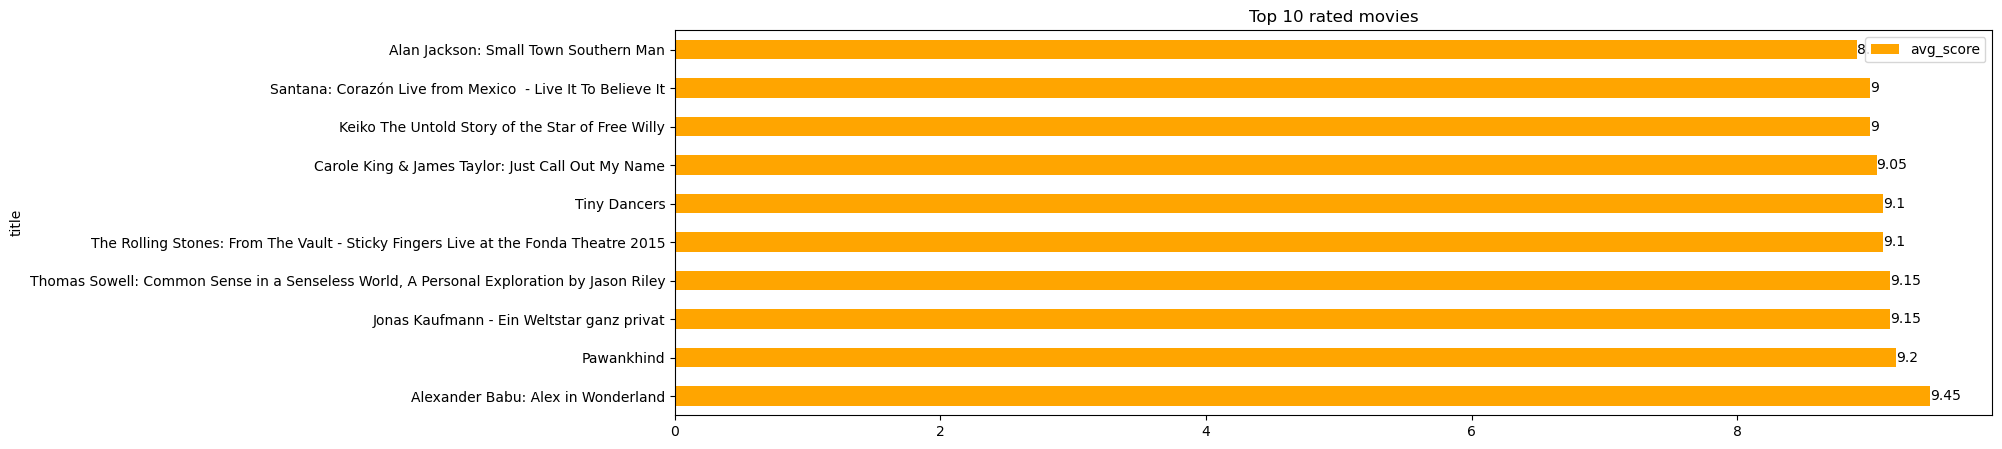

In [30]:
ax = top10_movie_score.plot.barh(figsize=(17, 5), color='orange', title='Top 10 rated movies')

ax.bar_label(ax.containers[0], fontsize=10);

Tương tự với phim, show truyền hình cũng sẽ có 1 số lượng show nhất định có nhiều hơn 1 dòng dữ liệu khác nhau. Ta cũng sẽ tính trung bình cho chúng.

In [31]:
show_score_table = pd.pivot_table(show_score, values='avg_score', index='title', aggfunc=np.mean)
top10_show_score= show_score_table.nlargest(n=10, columns='avg_score')
top10_show_score

,avg_score
title,
Corazón Contento,9.50
"Raja, Rasoi Aur Anya Kahaniyaan",9.45
Great Canal Journeys,9.40
The Chosen,9.40
Wildest Places,9.35
Secrets of the Castle,9.30
Making Their Mark,9.25
The World Between Us,9.20
Qing Luo,9.15


Bảng trên hiển thị 10 show truyền hình có điểm đánh giá trung bình cao nhất. Biểu độ cột dưới đây sẽ minh hoạ rõ hơn về kết quả thu được.

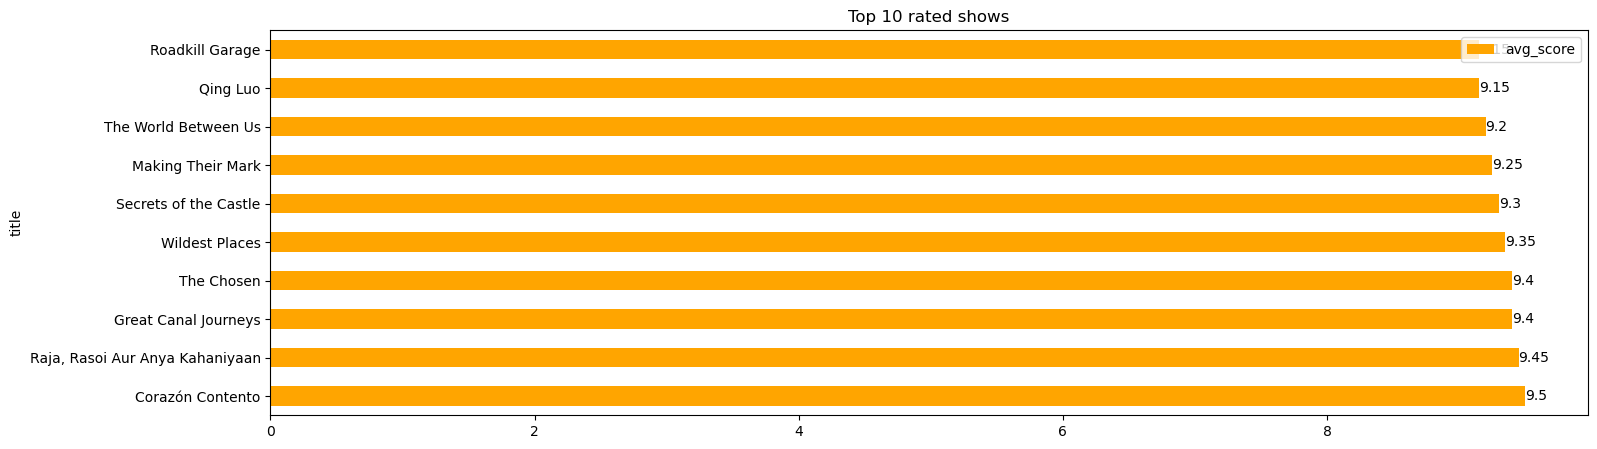

In [32]:
ax = top10_show_score.plot.barh(figsize=(17, 5), color='orange', title='Top 10 rated shows')

ax.bar_label(ax.containers[0], fontsize=10);

Kết quả thu được cho thấy những bộ phim và show truyền hình có điểm đánh giá cao nhất. Tuy nhiên, điều này lại không có nghĩa là các phim và show này nổi tiếng bởi lẽ điểm số cao cũng có thể đồng nghĩa với việc số lượng lượt bỏ phiếu đánh giá thấp (vì điểm đánh giá là điểm đánh giá trung bình dựa trên tất cả phiếu bầu). Mặc dù vậy, những bộ phim và show truyền hình này vẫn có giá trị đề cử vì được đánh giá rất cao bởi 1 lượng khán giá nhất định và giới phê bình.

### 3. IMDB score và TMDB score lần lượt là điểm số đánh giá trung bình của phim/show trên 2 nền tảng. Các điểm số này có thể đánh giá được chất lượng của phim/show và độ yêu thích của khán giả đối với phim/show đó. Vậy trong các bộ phim được ra mắt khoảng 10 năm trở lại đây, những thể loại phim/show nào nhận được điểm đánh giá cao nhất? (dựa theo 2 tiêu chí đánh giá được nêu)

Đầu tiên ta lấy từ tập dữ liệu các phim và show truyền hình ra mắt trong 10 năm đổ lại đây.

Mỗi phim và show có thể có nhiều hơn 1 thể loại. Chính vì thế ta cần trải tập dữ liệu ra và quy ước điểm đánh giá của tất cả thể loại của phim và show bằng điểm đánh giá của phim và show đó

In [33]:
genre_score = df_data[df_data['release_year'] >= 2012].loc[:, ['genres', 'imdb_score', 'tmdb_score']].drop_duplicates().dropna().reset_index(drop=True)
genre_score = genre_score[genre_score['genres'] != '']
genre_score['genres'].update(genre_score['genres'].str.split(', '))
genre_score = genre_score.explode('genres').dropna().reset_index(drop=True)
genre_score.head()

,genres,imdb_score,tmdb_score
0,crime,8.7,8.2
1,thriller,8.7,8.2
2,drama,8.7,8.2
3,european,8.7,8.2
4,drama,7.4,7.0


Có 2 tiêu chí đánh giá là IMDB score và TMDB score nên ta cần tính điểm đánh giá trung bình của mỗi thể loại

In [34]:
genre_score['avg_score'] = genre_score.loc[:, ['imdb_score', 'tmdb_score']].mean(axis=1)
genre_score.head()

,genres,imdb_score,tmdb_score,avg_score
0,crime,8.7,8.2,8.45
1,thriller,8.7,8.2,8.45
2,drama,8.7,8.2,8.45
3,european,8.7,8.2,8.45
4,drama,7.4,7.0,7.20


Vì các thể loại xuất hiện nhiều lần trong 10 năm, nên điểm đánh giá của mỗi thể loại sẽ được tính trung bình (tổng số điểm chia cho số lần xuất hiện). Ta cũng lưu lại số lần xuất hiện của các thể loại vào tập dữ liệu

In [35]:
genre_score_table = pd.pivot_table(genre_score, values='avg_score', index='genres', aggfunc={'genres': len, 'avg_score': np.mean})
genre_score_table = genre_score_table.rename(columns={'genres': 'occurences'})
genre_score_table.sort_values(by=['avg_score', 'occurences'])

,avg_score,occurences
genres,,
horror,5.555409,890
thriller,6.108896,2183
western,6.129154,78
comedy,6.308370,3184
action,6.332825,1741
romance,6.346638,1469
european,6.417286,742
scifi,6.432426,917
family,6.512234,851


Trước tiên ta thử xem kết quả nếu chỉ dựa trên điểm đánh giá trung bình trong 10 năm, biểu đồ cột dưới đây sẽ minh hoạ rõ kết quả đó.

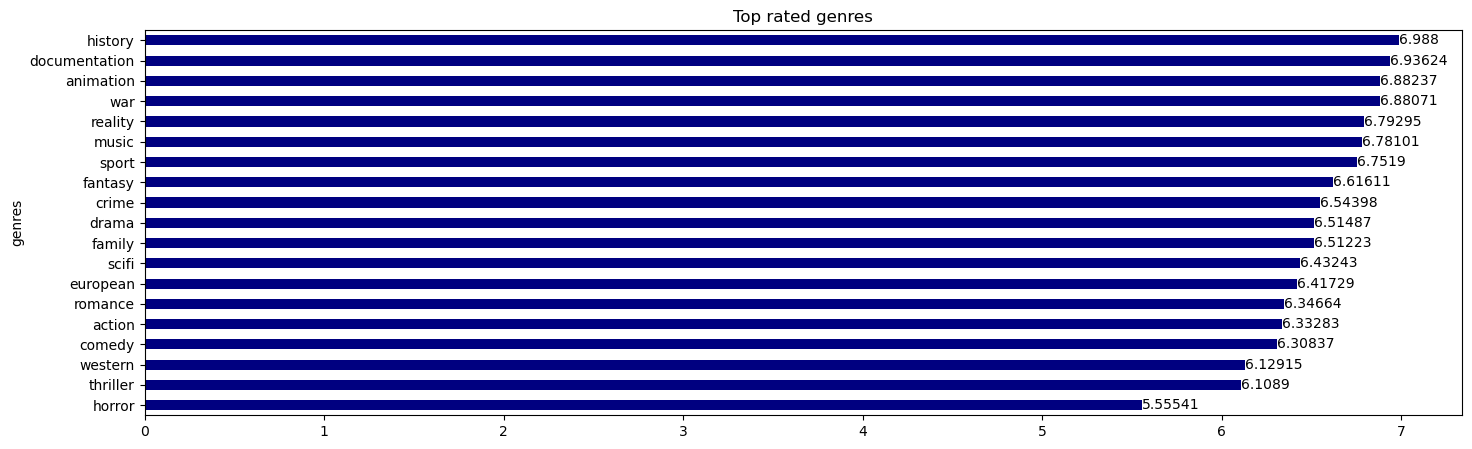

In [123]:
ax = genre_score_table['avg_score'].sort_values().plot.barh(figsize=(17, 5), color='navy', title='Top rated genres')

ax.bar_label(ax.containers[0], fontsize=10);

Phim/show thể loại lịch sử, tài liệu và chiến tranh có vẻ được đánh giá cao nhất bởi lẽ thể loại phim này là 1 thể loại kinh điển được các đạo diễn và nhà kịch bản ưa chuộng. Ngoài ra có sự xuất hiện của các thể loại như hoạt hình, âm nhạc, thể thao cho thấy xu hướng đi lên của các thể loại mang tính giải trí. 

Tuy nhiên đánh giá cho ra kết quả trên chưa đủ khách quan, nguyên nhân bởi điểm đánh giá trên phụ thuộc vào số lần xuất hiện của các thể loại. Ta xét sự tương quan giữa điểm đánh giá trung bình và tần suất của top 10 thể loại có điểm đánh giá cao nhất dựa trên biểu đồ điểm song cột dưới đây.

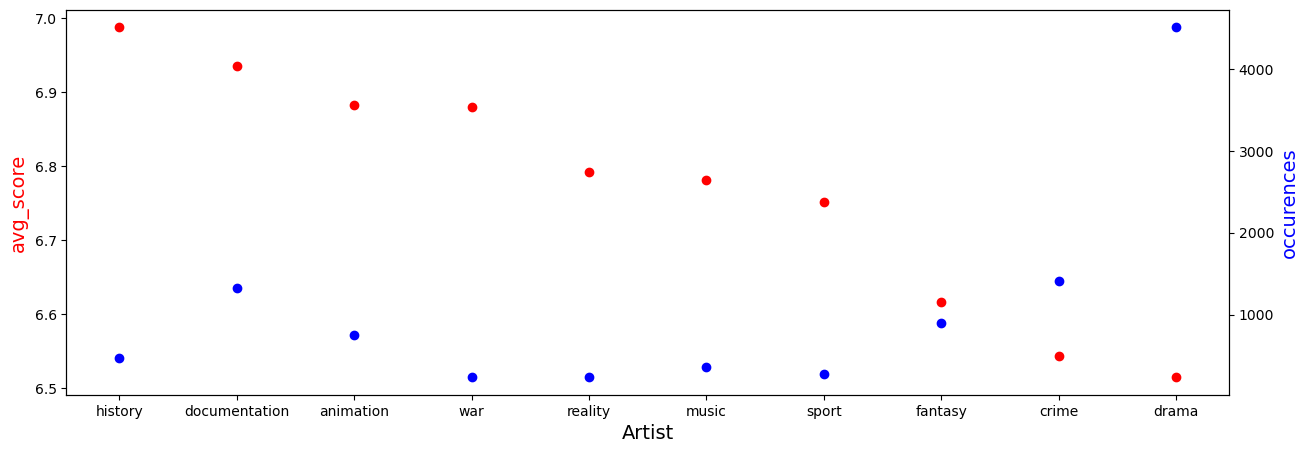

In [37]:
plotdata = genre_score_table.nlargest(n=10, columns=['avg_score', 'occurences'])

fig, ax = plt.subplots(figsize=(15, 5))
ax.scatter(plotdata.index, plotdata['avg_score'], color="red", marker='o')
ax.set_xlabel("Artist", fontsize = 14)
ax.set_ylabel("avg_score", color="red", fontsize=14)

ax2=ax.twinx()
ax2.scatter(plotdata.index, plotdata['occurences'], color="blue", marker='o')
ax2.set_ylabel("occurences", color="blue", fontsize=14)
plt.show()

Ta có thể thấy, thể loại kịch (drama) có số lần xuất hiện nhiều nhất nhưng lại có điểm số đánh giá trung bình thấp nhất trong top 10, trong khi chênh lệch điểm số đánh giá giữa các thể loại cũng không quá đáng kể (trong khoảng 0 - 1). Chính vì thế, để đánh giá khách quan hơn ta cần xét thêm yếu tố số luần xuất hiện. 

Ta sẽ tạo ra 1 chỉ số Rating mới để đánh giá.

Và để làm điều này, ta cần scale cột số lần xuất hiện về khoảng (1-10) - cũng là khoảng của cột điểm số đánh giá trung bình. Hàm được khởi tạo dưới đây dùng để thực hiện điều đó.

In [38]:
def MinMaxScaler1_10(s):
    return (9*(s - s.min()))/(s.max()-s.min()) + 1

rating = sqrt(MinMaxScaler1_10(Số lần xuất hiện) * điểm số đánh giá trung bình)

In [39]:
genre_score_table['rating'] = np.sqrt(MinMaxScaler1_10(genre_score_table['occurences']) * genre_score_table['avg_score'])
genre_score_table.sort_values(by='rating')

,avg_score,occurences,rating
genres,,,
western,6.129154,78,2.475713
reality,6.792954,237,2.997956
war,6.880714,243,3.031130
sport,6.751903,279,3.083777
music,6.781014,357,3.259674
history,6.988001,467,3.537205
horror,5.555409,890,3.836929
european,6.417286,742,3.882790
animation,6.882373,757,4.047031


Biểu đồ dưới đây minh hoạ rõ hơn về kết quả

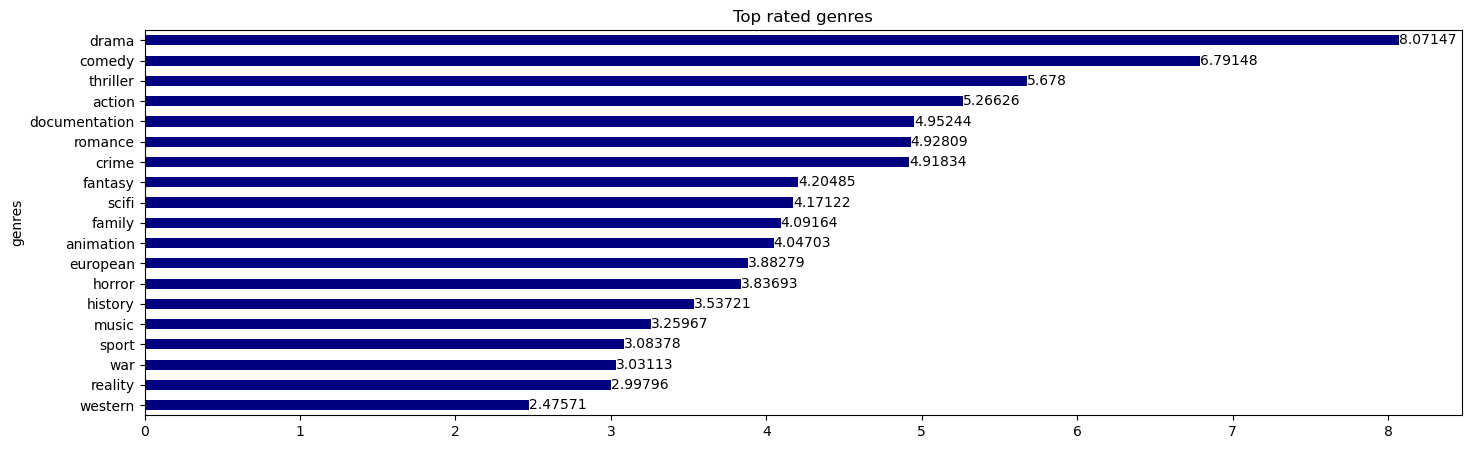

In [124]:
ax = genre_score_table['rating'].sort_values().plot.barh(figsize=(17, 5), color='navy', title='Top rated genres')

ax.bar_label(ax.containers[0], fontsize=10);

Kết quả thu được từ tiêu chí đánh giá mới cho thấy thể loại kịch (drama) mới là thể loại phim được đánh giá cao nhất với số điểm đánh giá trung bình khá cao và số lần xuất hiện vượt trội. Ngoài ra, thể loại hài (comedy), và các thể loại như giật gân (thriller) và hành động (action) cũng là các thể loại được đánh giá cao xếp hạng ngay sau thể loại kịch.

Kết nối với kết quả thu được ở tiêu chí đánh giá điểm trung bình trước đó, thì thể loại phim tài liệu (documentation), tội phạm (crime) và hư cấu (fantasy) cũng nằm trong top 10 thể loại được đánh giá cao nhất. Tuy nhiên, thể loại history ở tiêu chí đánh giá mới không còn là thể loại được đánh giá cao nhất với số lần xuất hiện khá thấp của mình.

Với việc đánh giá các thể loại dựa trên 2 tiêu chí đã đưa ra, ta có thể biết được đâu là những thể loại hay ho có giá trị tham khảo, đề cử cho khán giả và phục vụ cho mục đích đánh giá xa hơn.

### q6

In [215]:
genre_2020 = df_data[df_data['release_year'] == 2020].loc[:, ['genres']].drop_duplicates().dropna().reset_index(drop=True)
genre_2020 = genre_2020[genre_2020['genres'] != '']
genre_2020['genres'].update(genre_2020['genres'].str.split(', '))
genre_2020 = genre_2020.explode('genres').dropna().reset_index(drop=True)

In [216]:
genre_2021 = df_data[df_data['release_year'] == 2021].loc[:, ['genres']].drop_duplicates().dropna().reset_index(drop=True)
genre_2021 = genre_2021[genre_2021['genres'] != '']
genre_2021['genres'].update(genre_2021['genres'].str.split(', '))
genre_2021 = genre_2021.explode('genres').dropna().reset_index(drop=True)

In [217]:
genre_2022 = df_data[df_data['release_year'] == 2022].loc[:, ['genres']].drop_duplicates().dropna().reset_index(drop=True)
genre_2022 = genre_2022[genre_2022['genres'] != '']
genre_2022['genres'].update(genre_2022['genres'].str.split(', '))
genre_2022 = genre_2022.explode('genres').dropna().reset_index(drop=True)

In [222]:
top10_2020 = genre_2020.value_counts().to_frame().rename(columns={0:'2020'}).nlargest(n=10, columns='2020')
top10_2021 = genre_2021.value_counts().to_frame().rename(columns={0:'2021'}).nlargest(n=10, columns='2021')
top10_2022 = genre_2022.value_counts().to_frame().rename(columns={0:'2022'}).nlargest(n=10, columns='2022')

In [228]:
top3y = pd.merge(pd.merge(top10_2020, top10_2021, on='genres', how='left'), top10_2022, on='genres',  how='left')
top3y

,2020,2021,2022
genres,,,
drama,259,290.0,113.0
action,175,205.0,66.0
comedy,169,184.0,86.0
thriller,167,187.0,57.0
fantasy,117,124.0,39.0
scifi,116,125.0,45.0
crime,96,133.0,39.0
animation,82,97.0,31.0
romance,78,88.0,42.0


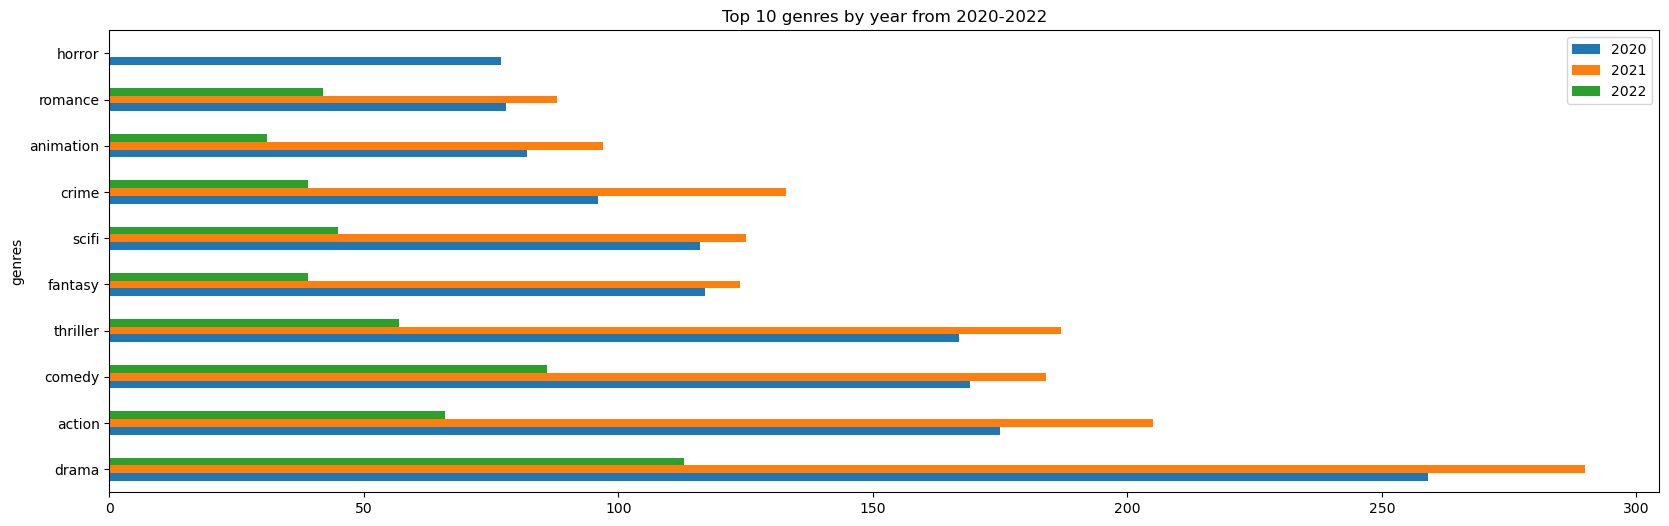

In [234]:
top3y.plot(kind='barh', figsize=(20, 6), title='Top 10 genres by year from 2020-2022');